In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

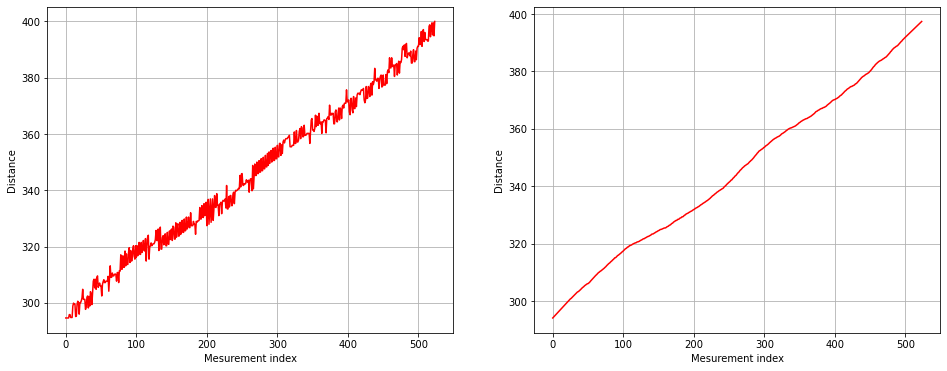

In [5]:
path = '/Users/Olivier/Desktop/Mini Tract/Tests_caracterisation_machine 1/Data/Test Tape/test1.txt'
df = pd.read_csv(path, sep=' ', names = ['strain', 'force'])

x = range(0, df.shape[0])
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
#plt.scatter(x, df['strain'], c='r')
plt.plot(x, df['strain'], c='r')
plt.grid('on')
plt.xlabel('Mesurement index')
plt.ylabel('Distance')

plt.subplot(1,2,2)
plt.plot(x, signal.savgol_filter(df['strain'], 51, 1), c='r')
plt.grid('on')
plt.xlabel('Mesurement index')
plt.ylabel('Distance')
plt.show()

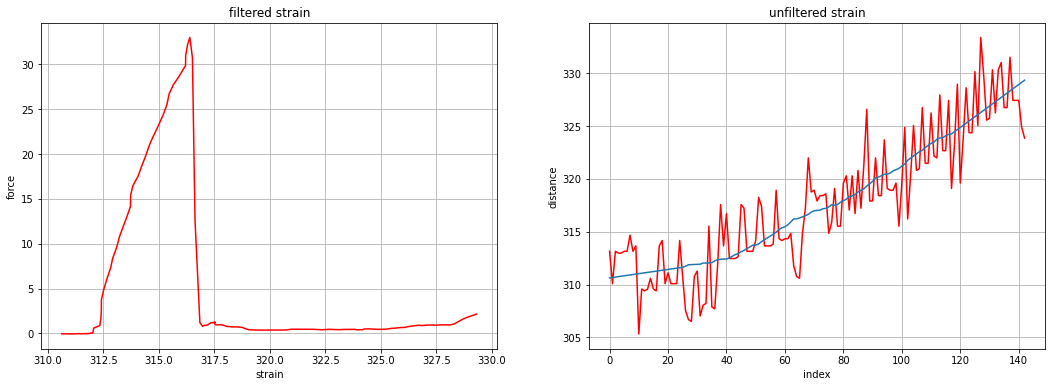

In [24]:
path = '/Users/Olivier/Desktop/Mini Tract/Tests_caracterisation_machine 1/Data/Test Tape/test2.txt'
df = pd.read_csv(path, sep=' ', names = ['strain', 'force'])

smooth_strain = signal.savgol_filter(df['strain'], 51, 1)

x = range(0, df.shape[0])
plt.figure(figsize=(18,6))
#plt.scatter(x, df['strain'], c='r')
plt.subplot(121)
plt.plot(smooth_strain, df['force'], c='r')
plt.grid('on')
plt.xlabel('strain')
plt.ylabel('force')
plt.title('filtered strain')
plt.subplot(122)
plt.plot(x, df['strain'], c='r')
plt.plot(x, smooth_strain)
plt.grid('on')
plt.xlabel('index')
plt.ylabel('distance')
plt.title('unfiltered strain')
plt.show()

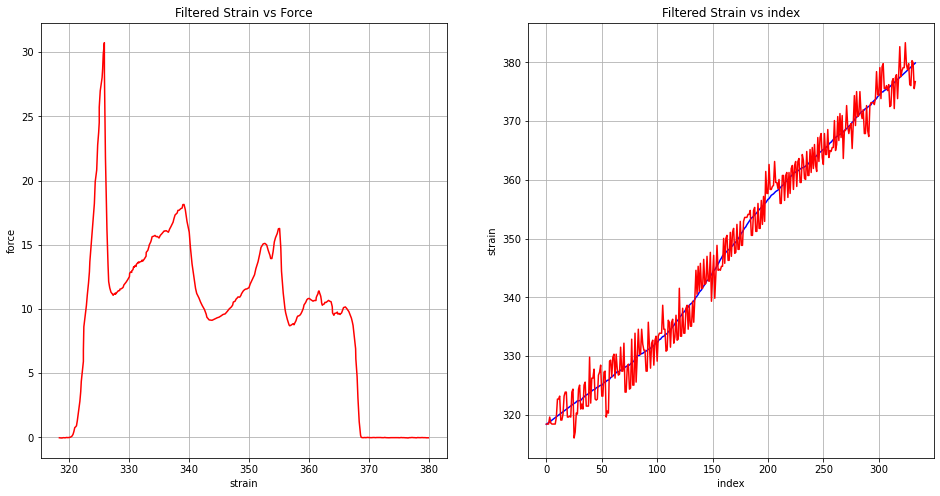

In [25]:
path = '/Users/Olivier/Desktop/Mini Tract/Tests_caracterisation_machine 1/Data/Test Tape/test3.txt'
df = pd.read_csv(path, sep=' ', names = ['strain', 'force'])

smooth_strain = signal.savgol_filter(df['strain'], 51, 1)

x = range(0, df.shape[0])
plt.figure(figsize=(16,8))

plt.subplot(121)
plt.plot(smooth_strain, df['force'], c='r')
plt.grid('on')
plt.xlabel('strain')
plt.ylabel('force')
plt.title('Filtered Strain vs Force')

plt.subplot(122)
plt.plot(x, smooth_strain, c='b')
plt.plot(x, df['strain'], c='r')
plt.grid('on')
plt.xlabel('index')
plt.ylabel('strain')
plt.title('Filtered Strain vs index')

plt.show()

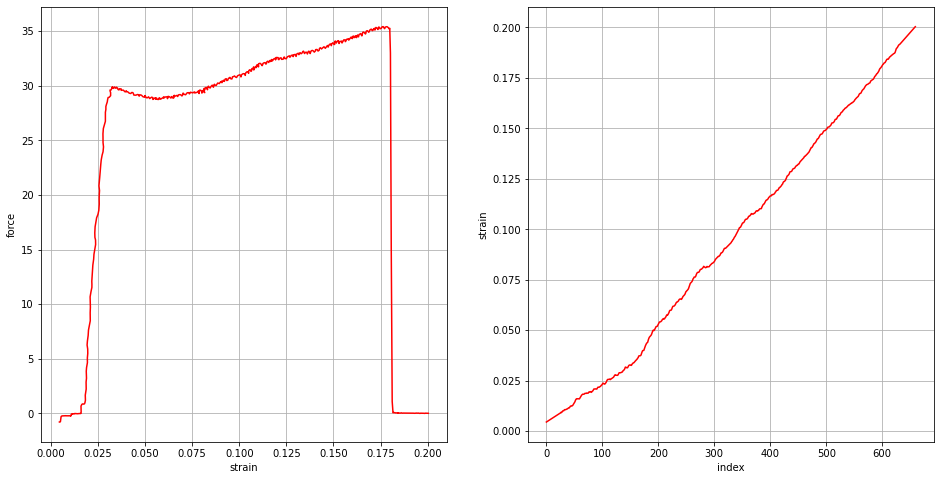

In [26]:
path = '/Users/Olivier/Desktop/Mini Tract/Tests_caracterisation_machine 1/Data/Test Tape/test4.txt'
df = pd.read_csv(path, sep=' ', names = ['strain', 'force'])



smooth_distance = signal.savgol_filter(df['strain'], 51, 1)
smooth_strain = (smooth_distance - 323.85)/323.85

x = range(0, df.shape[0])
plt.figure(figsize=(16,8))

plt.subplot(121)
plt.plot(smooth_strain, df['force'], c='r')
plt.grid('on')
plt.xlabel('strain')
plt.ylabel('force')

plt.subplot(122)
plt.plot(x, smooth_strain, c='r')
plt.grid('on')
plt.xlabel('index')
plt.ylabel('strain')

plt.show()

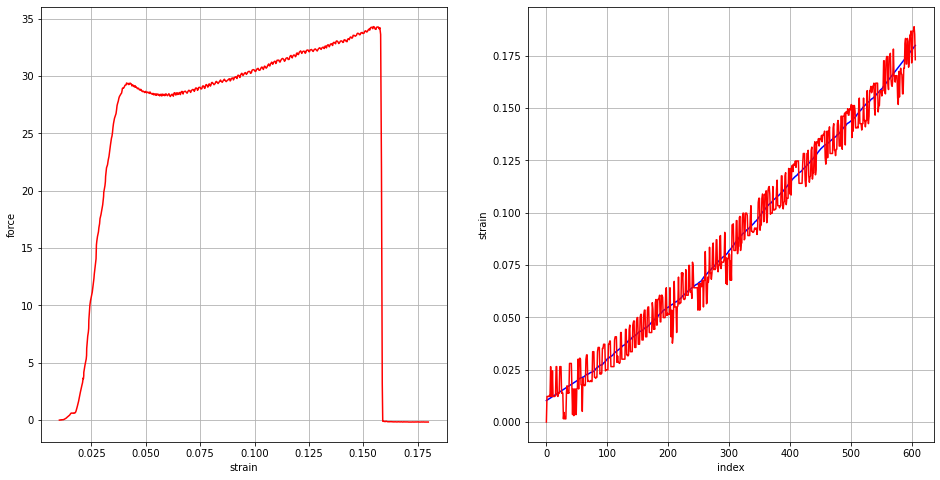

In [33]:
path = '/Users/Olivier/Desktop/Mini Tract/Tests_caracterisation_machine 1/Data/Test Tape/test5.txt'
df = pd.read_csv(path, sep=' ', names = ['strain', 'force'])

smooth_distance = signal.savgol_filter(df['strain'], 101, 1)
smooth_strain = (smooth_distance - 333.88 )/333.88

x = range(0, df.shape[0])
plt.figure(figsize=(16,8))

plt.subplot(121)
plt.plot(smooth_strain, df['force'], c='r')
plt.grid('on')
plt.xlabel('strain')
plt.ylabel('force')

plt.subplot(122)
plt.plot(x, smooth_strain, c='b')
plt.plot(x, (df['strain']-333.88)/333.88, c='r')
plt.grid('on')
plt.xlabel('index')
plt.ylabel('strain')

plt.show()

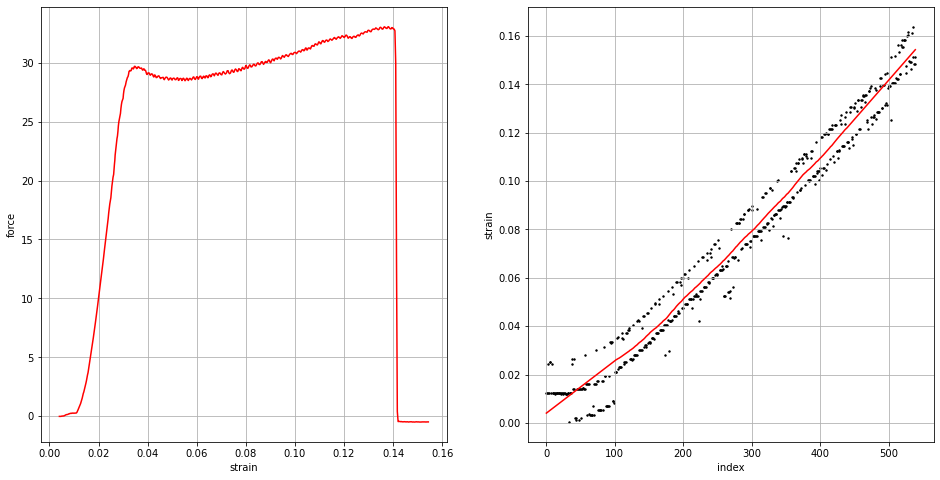

In [50]:
path = '/Users/Olivier/Desktop/Mini Tract/Tests_caracterisation_machine 1/Data/Test Tape/test6.txt'
df = pd.read_csv(path, sep=' ', names = ['strain', 'force'])

smooth_distance = signal.savgol_filter(df['strain'], 201, 1)
smooth_strain = (smooth_distance - 338  )/338

x = range(0, df.shape[0])
plt.figure(figsize=(16,8))

plt.subplot(121)
plt.plot(smooth_strain, df['force'], c='r')
plt.grid('on')
plt.xlabel('strain')
plt.ylabel('force')

plt.subplot(122)
plt.plot(x, smooth_strain, c='r')
plt.scatter(x, (df['strain']-338)/338, 2, c='k')
plt.grid('on')
plt.xlabel('index')
plt.ylabel('strain')

plt.show()

In [41]:
df1 = pd.read_csv('/Users/Olivier/Desktop/Mini Tract/Tests_caracterisation_machine 1/Data/Test Tape/test4.txt', sep=' ', names = ['strain', 'force'])
df2 = pd.read_csv('/Users/Olivier/Desktop/Mini Tract/Tests_caracterisation_machine 1/Data/Test Tape/test5.txt', sep=' ', names = ['strain', 'force'])
df3 = pd.read_csv('/Users/Olivier/Desktop/Mini Tract/Tests_caracterisation_machine 1/Data/Test Tape/test6.txt', sep=' ', names = ['strain', 'force'])
dfs = [df1, df2, df3]

new_dfs = []
for df in dfs:
    df = df.drop(df[df['force']<3].index)
    df['strain'] = (df['strain'] - df['strain'].min()) / df['strain'].min()
    new_dfs.append(df)

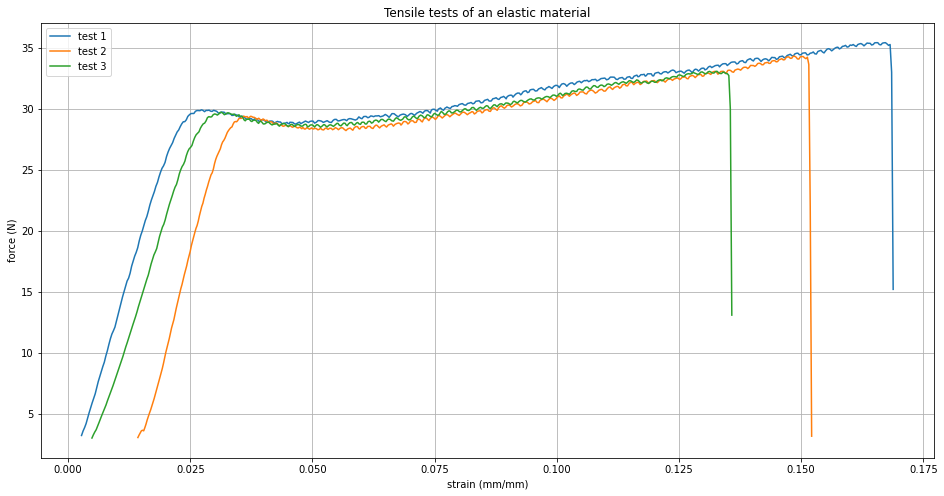

In [42]:
plt.figure(figsize=(16,8))
for i, df, ini_dist in zip(range(1,4), new_dfs, [323, 333, 338]):
    smooth_strain = signal.savgol_filter(df['strain'], 201, 1)
    plt.plot(smooth_strain, df['force'], label = 'test ' + str(i))
    
plt.grid('on')
plt.xlabel('strain (mm/mm)')
plt.legend()
plt.title('Tensile tests of an elastic material')
plt.ylabel('force (N)')
plt.show()

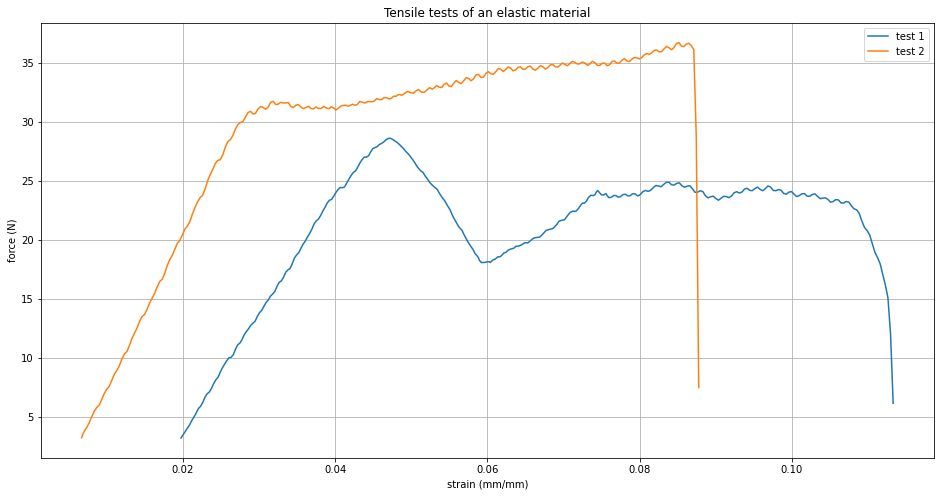

In [8]:
df1 = pd.read_csv('/Users/Olivier/Desktop/test1.txt', sep=' ', names = ['strain', 'force'])
df2 = pd.read_csv('/Users/Olivier/Desktop/test2.txt', sep=' ', names = ['strain', 'force'])
dfs = [df1, df2]

new_dfs = []
for df in dfs:
    df = df.drop(df[df['force']<3].index)
    df['strain'] = (df['strain'] - df['strain'].min()) / df['strain'].min()
    new_dfs.append(df)
    
plt.figure(figsize=(16,8))
for i, df in zip(range(1,4), new_dfs):
    smooth_strain = signal.savgol_filter(df['strain'], 201, 1)
    plt.plot(smooth_strain, df['force'], label = 'test ' + str(i))
    
plt.grid('on')
plt.xlabel('strain (mm/mm)')
plt.legend()
plt.title('Tensile tests of an elastic material')
plt.ylabel('force (N)')
plt.show()